In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14149, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14149 (delta 8), reused 14 (delta 8), pack-reused 14130
Receiving objects: 100% (14149/14149), 13.53 MiB | 33.97 MiB/s, done.
Resolving deltas: 100% (9725/9725), done.


In [ ]:
!pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 8.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 65.6 MB/s 


In [ ]:
!unzip /content/Notes_Dataset.zip

Archive:  /content/Notes_Dataset.zip
   creating: .ipynb_checkpoints/
   creating: images/
   creating: labels/
   creating: images/.ipynb_checkpoints/
   creating: images/train/
   creating: images/val/
  inflating: images/val/img-20220511-wa0094.jpg  
  inflating: images/val/20220511_133548.jpg  
  inflating: images/val/img_20220511_124042.jpg  
  inflating: images/val/img_20220511_124811.jpg  
  inflating: images/val/20220511_124434.jpg  
  inflating: images/val/1d2de0b3-c6d8-49d1-8481-6c1157785aae.jpg  
  inflating: images/val/img_2551.jpg  
  inflating: images/val/20220511_133554.jpg  
  inflating: images/val/img-20220511-wa0017.jpg  
  inflating: images/val/img_6261.jpg  
  inflating: images/val/img-20220511-wa0405.jpg  
  inflating: images/val/e362102b-5c3b-41d4-a1f6-5fd4a41701bf.jpg  
  inflating: images/val/20220511_131639.jpg  
  inflating: images/val/20220511_132251.jpg  
  inflating: images/val/20220511_123823.jpg  
  inflating: images/val/img_20220511_131102.jpg  
  inflat

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

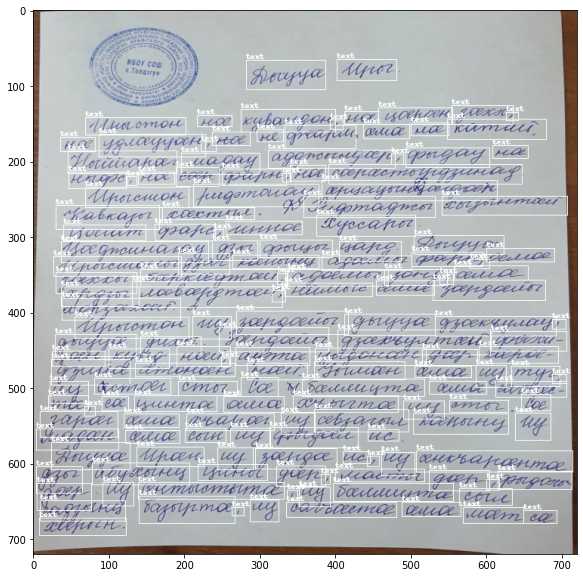

In [ ]:
from matplotlib.pyplot import figure


# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"text": 0}
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()


# Get any random annotation file 
image_file = '/content/images/train/20220511_124357.jpg'
annotation_file = '/content/labels/train/20220511_124357.txt'

with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
assert os.path.exists(image_file)

#Load the image
plt.figure(figsize=(10,10))
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
# Read images and annotations
train_images = [os.path.join('/content/yolov5/train/images/', x) for x in os.listdir('/content/yolov5/train/images')]
train_annotations = [os.path.join('/content/yolov5/train/labels/', x) for x in os.listdir('/content/yolov5/train/labels') if x[-3:] == "txt"]

val_images = [os.path.join('/content/yolov5/valid/images', x) for x in os.listdir('/content/yolov5/valid/images')]
val_annotations = [os.path.join('/content/yolov5/valid/labels', x) for x in os.listdir('/content/yolov5/valid/labels') if x[-3:] == "txt"]


train_images.sort()
train_annotations.sort()

val_images.sort()
val_annotations.sort()

In [ ]:
import os 
files = os.listdir('/content/yolov5/Notes_Dataset/labels/val')
for file_t in files: 
  with open('/content/yolov5/Notes_Dataset/labels/val/'+file_t,'r')as read:
      t=read.readlines()
      for_write = [str(int(ind[0])-1)+ind[1:] for ind in t]
  with open('/content/yolov5/Notes_Dataset/labels/val/'+file_t,'w') as write:
      write.writelines(for_write)

In [ ]:
%cd yolov5 


/content/yolov5


In [ ]:
!python train.py --img 720 --cfg /content/yolov5/models/yolov5m.yaml --hyp /content/yolov5/data/hyps/hyp.VOC.yaml --batch 16 --epochs 70 --data /content/yolov5/notes_data.yaml --weights yolov5m.pt --optimizer AdamW --workers 16 --name yolo_road_det  


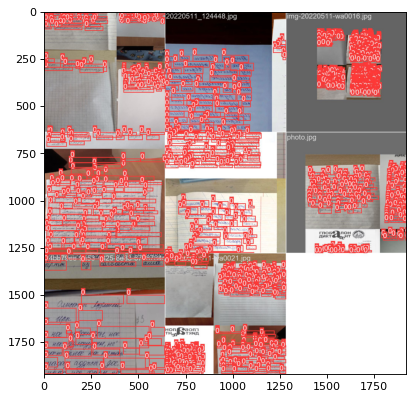

In [ ]:
from matplotlib.pyplot import figure



random_detection_image = Image.open('/content/yolov5/runs/train/yolo_road_det19/train_batch2.jpg')

plt.figure
figure(figsize=(10, 10), dpi=80)

plt.imshow(np.array(random_detection_image))